In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("bank.csv", sep=";")
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14021,44,management,married,tertiary,no,756,yes,no,cellular,11,jul,122,2,-1,0,unknown,no
5496,32,self-employed,single,secondary,no,4,yes,no,unknown,23,may,233,2,-1,0,unknown,no
27438,42,blue-collar,married,secondary,no,0,yes,no,cellular,21,nov,328,6,-1,0,unknown,no
41522,77,retired,single,primary,no,300,no,no,cellular,9,sep,511,1,-1,0,unknown,no
28620,31,technician,divorced,secondary,no,0,no,no,cellular,29,jan,138,2,164,4,other,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
  print(col, ":-")
  print(df[col].unique())

age :-
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital :-
['married' 'single' 'divorced']
education :-
['tertiary' 'secondary' 'unknown' 'primary']
default :-
['no' 'yes']
balance :-
[ 2143    29     2 ...  8205 14204 16353]
housing :-
['yes' 'no']
loan :-
['no' 'yes']
contact :-
['unknown' 'cellular' 'telephone']
day :-
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration :-
[ 261  151   76 ... 1298 1246 1556]
campaign :-
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41

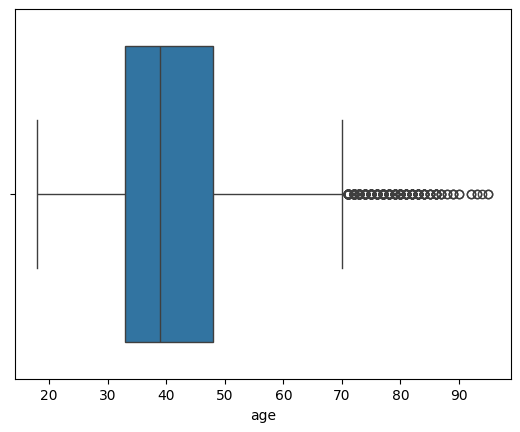

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["age"])
plt.show()

<Axes: xlabel='age', ylabel='Density'>

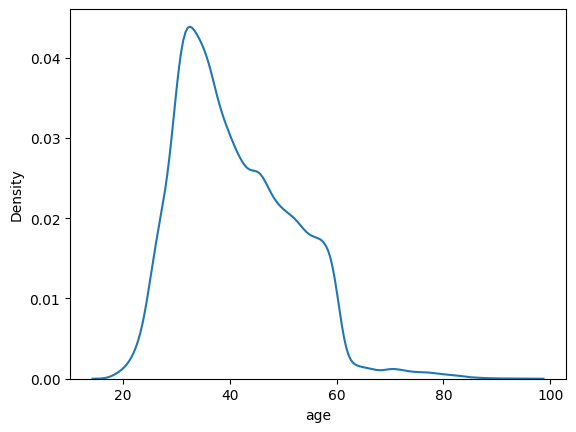

In [ ]:
sns.kdeplot(df["age"])

In [ ]:
# Capping
q1, q3 = df['age'].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df['age'] = df['age'].clip(lower, upper)

<Axes: xlabel='age'>

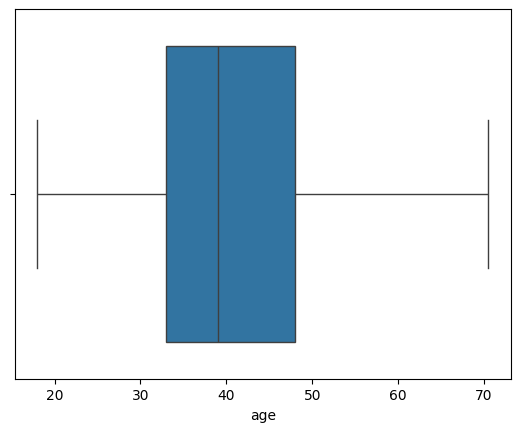

In [ ]:
sns.boxplot(x=df["age"])

<Axes: xlabel='age', ylabel='Density'>

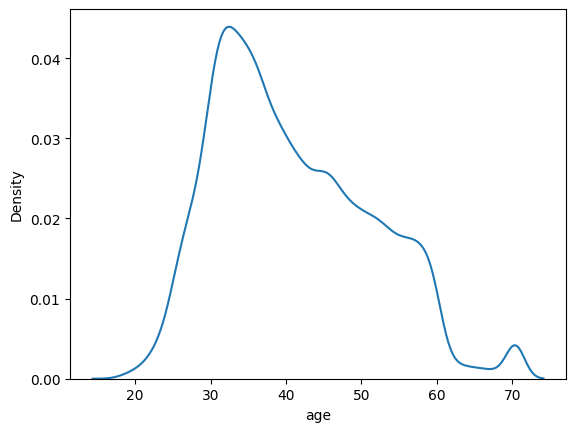

In [ ]:
sns.kdeplot(df["age"])

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ["age", "balance", "campaign", "pdays", "previous"]
sc = StandardScaler()
df_scaled = sc.fit_transform(df[cols])
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled

,age,balance,campaign,pdays,previous
0,1.648117,0.256419,-0.569351,-0.411453,-0.251940
1,0.301287,-0.437895,-0.569351,-0.411453,-0.251940
2,-0.756936,-0.446762,-0.569351,-0.411453,-0.251940
3,0.589894,0.047205,-0.569351,-0.411453,-0.251940
4,-0.756936,-0.447091,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...
45206,0.974702,-0.176460,0.076230,-0.411453,-0.251940
45207,2.850644,0.120447,-0.246560,-0.411453,-0.251940
45208,2.850644,1.429593,0.721811,1.436189,1.050473
45209,1.551915,-0.228024,0.399020,-0.411453,-0.251940


In [ ]:
df = df.drop(cols, axis=1)
df = pd.concat([df, df_scaled], axis=1)
df

,job,marital,education,default,housing,loan,contact,day,month,duration,poutcome,y,age,balance,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,5,may,261,unknown,no,1.648117,0.256419,-0.569351,-0.411453,-0.251940
1,technician,single,secondary,no,yes,no,unknown,5,may,151,unknown,no,0.301287,-0.437895,-0.569351,-0.411453,-0.251940
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,unknown,no,-0.756936,-0.446762,-0.569351,-0.411453,-0.251940
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,unknown,no,0.589894,0.047205,-0.569351,-0.411453,-0.251940
4,unknown,single,unknown,no,no,no,unknown,5,may,198,unknown,no,-0.756936,-0.447091,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,17,nov,977,unknown,yes,0.974702,-0.176460,0.076230,-0.411453,-0.251940
45207,retired,divorced,primary,no,no,no,cellular,17,nov,456,unknown,yes,2.850644,0.120447,-0.246560,-0.411453,-0.251940
45208,retired,married,secondary,no,no,no,cellular,17,nov,1127,success,yes,2.850644,1.429593,0.721811,1.436189,1.050473
45209,blue-collar,married,secondary,no,no,no,telephone,17,nov,508,unknown,no,1.551915,-0.228024,0.399020,-0.411453,-0.251940


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cols = ["education", "default", "housing", "loan"]
oe = OrdinalEncoder()
df_oe = oe.fit_transform(df[cols])
df_oe = pd.DataFrame(df_oe, columns=cols)
df = df.drop(cols, axis=1)
df = pd.concat([df, df_oe], axis=1)
df

,job,marital,contact,day,month,duration,poutcome,y,age,balance,campaign,pdays,previous,education,default,housing,loan
0,management,married,unknown,5,may,261,unknown,no,1.648117,0.256419,-0.569351,-0.411453,-0.251940,2.0,0.0,1.0,0.0
1,technician,single,unknown,5,may,151,unknown,no,0.301287,-0.437895,-0.569351,-0.411453,-0.251940,1.0,0.0,1.0,0.0
2,entrepreneur,married,unknown,5,may,76,unknown,no,-0.756936,-0.446762,-0.569351,-0.411453,-0.251940,1.0,0.0,1.0,1.0
3,blue-collar,married,unknown,5,may,92,unknown,no,0.589894,0.047205,-0.569351,-0.411453,-0.251940,3.0,0.0,1.0,0.0
4,unknown,single,unknown,5,may,198,unknown,no,-0.756936,-0.447091,-0.569351,-0.411453,-0.251940,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,cellular,17,nov,977,unknown,yes,0.974702,-0.176460,0.076230,-0.411453,-0.251940,2.0,0.0,0.0,0.0
45207,retired,divorced,cellular,17,nov,456,unknown,yes,2.850644,0.120447,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0
45208,retired,married,cellular,17,nov,1127,success,yes,2.850644,1.429593,0.721811,1.436189,1.050473,1.0,0.0,0.0,0.0
45209,blue-collar,married,telephone,17,nov,508,unknown,no,1.551915,-0.228024,0.399020,-0.411453,-0.251940,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cols = ["job", "marital", "poutcome"]
ohe = OneHotEncoder(drop="first")
df_ohe = ohe.fit_transform(df[cols])
df_ohe = pd.DataFrame(df_ohe.toarray(), columns=ohe.get_feature_names_out())
df = df.drop(cols, axis=1)
df = pd.concat([df, df_ohe], axis=1)
df

,contact,day,month,duration,y,age,balance,campaign,pdays,previous,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown
0,unknown,5,may,261,no,1.648117,0.256419,-0.569351,-0.411453,-0.251940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,unknown,5,may,151,no,0.301287,-0.437895,-0.569351,-0.411453,-0.251940,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,unknown,5,may,76,no,-0.756936,-0.446762,-0.569351,-0.411453,-0.251940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,unknown,5,may,92,no,0.589894,0.047205,-0.569351,-0.411453,-0.251940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,unknown,5,may,198,no,-0.756936,-0.447091,-0.569351,-0.411453,-0.251940,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,cellular,17,nov,977,yes,0.974702,-0.176460,0.076230,-0.411453,-0.251940,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45207,cellular,17,nov,456,yes,2.850644,0.120447,-0.246560,-0.411453,-0.251940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,cellular,17,nov,1127,yes,2.850644,1.429593,0.721811,1.436189,1.050473,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
45209,telephone,17,nov,508,no,1.551915,-0.228024,0.399020,-0.411453,-0.251940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ["y"]
le = LabelEncoder()
df_le = le.fit_transform(df[cols])
df_le = pd.DataFrame(df_le, columns=cols)
df = df.drop(cols, axis=1)
df = pd.concat([df, df_le], axis=1)
df

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,contact,day,month,duration,age,balance,campaign,pdays,previous,education,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,y
0,unknown,5,may,261,1.648117,0.256419,-0.569351,-0.411453,-0.251940,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,unknown,5,may,151,0.301287,-0.437895,-0.569351,-0.411453,-0.251940,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,unknown,5,may,76,-0.756936,-0.446762,-0.569351,-0.411453,-0.251940,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,unknown,5,may,92,0.589894,0.047205,-0.569351,-0.411453,-0.251940,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,unknown,5,may,198,-0.756936,-0.447091,-0.569351,-0.411453,-0.251940,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,cellular,17,nov,977,0.974702,-0.176460,0.076230,-0.411453,-0.251940,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
45207,cellular,17,nov,456,2.850644,0.120447,-0.246560,-0.411453,-0.251940,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45208,cellular,17,nov,1127,2.850644,1.429593,0.721811,1.436189,1.050473,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
45209,telephone,17,nov,508,1.551915,-0.228024,0.399020,-0.411453,-0.251940,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [ ]:
df = df.drop(["day", "month", "contact"], axis=1)
df

,duration,age,balance,campaign,pdays,previous,education,default,housing,loan,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,y
0,261,1.648117,0.256419,-0.569351,-0.411453,-0.251940,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,151,0.301287,-0.437895,-0.569351,-0.411453,-0.251940,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,76,-0.756936,-0.446762,-0.569351,-0.411453,-0.251940,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,92,0.589894,0.047205,-0.569351,-0.411453,-0.251940,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,198,-0.756936,-0.447091,-0.569351,-0.411453,-0.251940,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,977,0.974702,-0.176460,0.076230,-0.411453,-0.251940,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
45207,456,2.850644,0.120447,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45208,1127,2.850644,1.429593,0.721811,1.436189,1.050473,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
45209,508,1.551915,-0.228024,0.399020,-0.411453,-0.251940,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("y", axis=1)
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8981532677208891

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8915183014486343

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9047882339931439

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50, 100, 150]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, params in model_params.items():
  clf = GridSearchCV(params['model'], params['params'], cv=3, return_train_score=False)
  clf.fit(X, y)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

pd.DataFrame(scores, columns=['model','best_score','best_params'])

,model,best_score,best_params
0,random_forest,0.806882,{'n_estimators': 100}
1,logistic_regression,0.872287,{'C': 1}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, C=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9047882339931439

Text(50.722222222222214, 0.5, 'Truth')

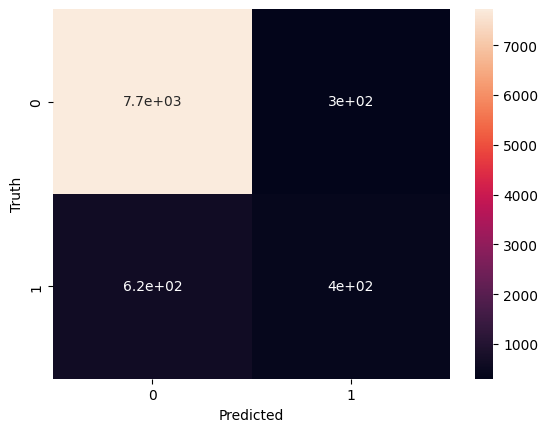

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

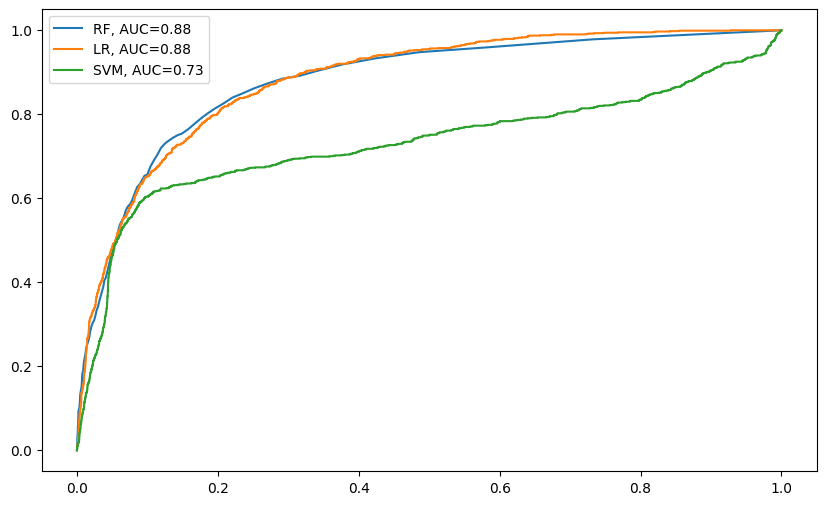

In [ ]:
from sklearn.metrics import roc_curve, auc
y_score_rf = rf.predict_proba(X_test)[:,1]
y_score_log = lr.predict_proba(X_test)[:,1]
y_score_svm = svc.decision_function(X_test)

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_score_rf)
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_score_log)
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_score_svm)

auc_rf = auc(fpr_rf, tpr_rf)
auc_log = auc(fpr_log, tpr_log)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"RF, AUC={auc_rf:.2f}")
plt.plot(fpr_log, tpr_log, label=f"LR, AUC={auc_log:.2f}")
plt.plot(fpr_svm, tpr_svm, label=f"SVM, AUC={auc_svm:.2f}")
plt.legend()
plt.show()